Bu çalışmada, websitesine ait kullanıcı verilerini içeren ve makine öğrenmesi modellerine uygun yapıda olan Customer Experience veri seti incelenmiştir. Veri setini seçmemde, hem kullanıcı davranışlarına odaklanması hem de modelleme açısından uygun olması etkili olmuştur.

In [1252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [1254]:
file_path= r'C:\Users\Lenovo\Desktop\customer_experience_data.csv'
df= pd.read_csv(file_path)
df

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,Female,Rural,12,4,5,37,11.853828,8,Churned,0,0,0
996,997,64,Male,Rural,5,4,11,5,25.124461,5,Retained,1,0,1
997,998,62,Female,Rural,6,1,5,28,17.616643,2,Retained,0,0,1
998,999,35,Male,Rural,11,5,4,8,17.006671,9,Retained,1,0,1


### Veriye genel bir bakış

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

#### Verinin 1000 satır ve 14 sütundan oluştuğu görülüyor.

In [113]:
# İlk 5 veri

df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [115]:
# Son 5 veri

df.tail()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
995,996,60,Female,Rural,12,4,5,37,11.853828,8,Churned,0,0,0
996,997,64,Male,Rural,5,4,11,5,25.124461,5,Retained,1,0,1
997,998,62,Female,Rural,6,1,5,28,17.616643,2,Retained,0,0,1
998,999,35,Male,Rural,11,5,4,8,17.006671,9,Retained,1,0,1
999,1000,55,Male,Rural,2,1,12,8,8.008125,8,Churned,1,0,0


## Veri setini tanıma  

  ### Değişkenlerin Açıklaması (Feature Descriptions)

Aşağıda her bir değişkenin neyi ifade ettiği ve analiz açısından neden önemli olabileceği açıklanmıştır:

- **Customer_ID**: Her müşteriye ait benzersiz kimlik numarasıdır. Veri kümesinde ayırt edici bir kimlik olarak kullanılır.

- **Age**: Müşterinin yaşıdır. Yaş gruplarına göre kullanıcı davranışları farklılık gösterebilir. Bu nedenle segmentasyon için önemlidir.

- **Gender**: Müşterinin cinsiyetini belirtir. Cinsiyete göre memnuniyet, satın alma ve site kullanımı farklılık gösterebilir.

- **Location**: Müşterinin yaşadığı bölge türünü gösterir. Veri seti Urban, Suburban ve Rural değerleri içerir. Bölgeye göre dijital alışkanlıklar değişebilir. Bu nedenle analiz için önemlidir.

- **Num_Interactions**: Müşterinin siteyle kaç kez etkileşim kurduğunu belirtir. Kullanıcı bağlılığını ve ilgisini ölçmekte kullanılır.

- **Feedback_Score**: Müşterinin verdiği geri bildirim (feedback) puanıdır. Veri seti 1–5 arası değerlendirme içerir. Kalite ve memnuniyet düzeyini gösterir.

- **Products_Purchased**: Müşterinin toplam satın aldığı ürün sayısını gösterir. Alışveriş hacmini ölçmek için önemlidir.

- **Products_Viewed**: Müşterinin incelediği ürün sayısını gösterir. İlgi düzeyini yansıtır.

- **Time_Spent_on_Site**: Müşterinin platformda geçirdiği toplam süreyi dakika olarak gösterir. Kullanıcı deneyimi ve ilgisi hakkında fikir verir.

- **Satisfaction_Score**: Müşterinin genel memnuniyet düzeyini sayısal olarak gösterir. Veri setinde 1–10 arası değerlendirme yapılmıştır. Terk riski (churn) analizinde önemli bir göstergedir.

- **Retention_Status**: Müşterinin platformda hâlâ aktif olup olmadığını belirtir. "Retained" müşterilerin aktif olduğunu, "Churned" müşterilerin platformu terk ettiğini ifade eder.

- **Gender_Encoded**: Cinsiyet değişkeninin sayısal karşılığıdır. Veri setinde Erkek = 1, Kadın = 0 olarak kodlanmıştır. Makine öğrenmesi modellerinde kullanılmak üzere hazırlanmıştır.

- **Location_Encoded**: Bölge bilgisinin sayısal karşılığıdır. Veri setinde Urban = 2, Suburban = 1, Rural = 0 olarak kodlanmıştır. Makine öğrenmesi modellerinde kullanılmak üzere hazırlanmıştır.

- **Retention_Status_Encoded**: Müşteri elde tutma durumunun sayısal karşılığıdır. Veri setinde Retained = 1, Churned = 0 olarak kodlanmıştır. Makine öğrenmesi modellerinde kullanılmak üzere hazırlanmıştır. 


#### Bazı değişkenlerin detaylarını görmek için yaptığım işlemler:


In [75]:
# Location  bilgisi için

df["Location"]. value_counts()

Location
Urban       344
Suburban    344
Rural       312
Name: count, dtype: int64

In [77]:
# Feedback_score için

df["Feedback_Score"].value_counts().sort_index()

Feedback_Score
1    211
2    183
3    212
4    198
5    196
Name: count, dtype: int64

In [79]:
# Time_Spent_on_Site için

df["Time_Spent_on_Site"].describe()

count    1000.000000
mean       32.274399
std        15.734978
min         5.114208
25%        18.836771
50%        32.455598
75%        45.932524
max        59.947722
Name: Time_Spent_on_Site, dtype: float64

> **Not:** Veri setinde bu değişkenin birimi (dakika/saat) açıkça belirtilmemiştir. 
Ancak değişkenin ortalama değerinin yaklaşık 32, maksimum değerinin ise yaklaşık 60 civarında olması, bu sürenin dakika cinsinden olduğu sonucunu desteklemektedir. 
Ayrıca, web analitiğinde oturum sürelerinin genellikle dakika cinsinden ölçülmesi bu varsayımı güçlendirmektedir. 
Bu nedenle analizlerde, **Time_Spent_on_Site** değişkeni dakika birimiyle değerlendirilmiştir.


In [81]:
# satisfaction_score için

df["Satisfaction_Score"].value_counts().sort_index()

Satisfaction_Score
1      96
2     115
3      99
4      79
5      97
6      96
7     115
8      98
9      99
10    106
Name: count, dtype: int64

In [85]:
# Gender_Encoded için

df.groupby("Gender")["Gender_Encoded"].value_counts()

Gender  Gender_Encoded
Female  0                 476
Male    1                 524
Name: count, dtype: int64

In [87]:
# Locastion_Encoded için

df.groupby("Location")["Location_Encoded"].value_counts()

Location  Location_Encoded
Rural     0                   312
Suburban  1                   344
Urban     2                   344
Name: count, dtype: int64

In [59]:
# Retention_Status_Encoded için

df.groupby("Retention_Status")["Retention_Status_Encoded"].value_counts()

Retention_Status  Retention_Status_Encoded
Churned           0                           306
Retained          1                           694
Name: count, dtype: int64

### İstatistiksel Özet

In [106]:
df.describe().T 
# Transpoze ile çıktı daha okunaklı hale getirildi.

,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Age,1000.0,43.819000,14.991030,18.000000,31.000000,44.000000,56.000000,69.000000
Num_Interactions,1000.0,7.545000,4.016978,1.000000,4.000000,8.000000,11.000000,14.000000
Feedback_Score,1000.0,2.985000,1.418022,1.000000,2.000000,3.000000,4.000000,5.000000
Products_Purchased,1000.0,10.417000,5.345623,1.000000,6.000000,11.000000,15.000000,19.000000
Products_Viewed,1000.0,27.370000,12.939572,5.000000,17.000000,27.500000,38.000000,49.000000
Time_Spent_on_Site,1000.0,32.274399,15.734978,5.114208,18.836771,32.455598,45.932524,59.947722
Satisfaction_Score,1000.0,5.540000,2.904279,1.000000,3.000000,6.000000,8.000000,10.000000
Gender_Encoded,1000.0,0.524000,0.499674,0.000000,0.000000,1.000000,1.000000,1.000000
Location_Encoded,1000.0,1.032000,0.809711,0.000000,0.000000,1.000000,2.000000,2.000000



Veri setindeki istatistiksel özet incelendiğinde, kullanıcıların yaş ortalamasının yaklaşık 44 olduğu ve etkileşim sayılarının (Num_Interactions) ortalama 7.5 seviyesinde olduğu görülmektedir. 
 
Ürün görüntüleme ortalaması (27.3), satın alma ortalamasından (10.4) belirgin şekilde yüksektir. 
Kullanıcıların sitede ortalama 32 dakika geçirdiği ve memnuniyet skorunun   1–10 arasında 5.5 ortalamayla orta seviyede kaldığı gözlemlenmiştir.
Ayrıca, veri setindeki müşterilerin yaklaşık %69’unun elde tutulduğu (retained), %31’inin ise kaybedildiği (churned) görülmektedir.



In [221]:
# Tüm verilerin modu

df.mode(). head(3)


,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,43.0,Male,Suburban,9.0,3.0,15.0,49.0,5.114208,2.0,Retained,1.0,1.0,1.0
1,2,45.0,NaN,Urban,14.0,NaN,NaN,NaN,5.127787,7.0,NaN,NaN,2.0,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.148948,NaN,NaN,NaN,NaN,NaN


In [208]:
df["Time_Spent_on_Site"].round().mode()


0    33.0
Name: Time_Spent_on_Site, dtype: float64

Time_Spent_on_Site verileri incelendiğinde, ondalıklı değerler nedeniyle doğrudan mod analizinde anlamlı bir sonuç elde edilememiştir. Bu nedenle değerler tam sayıya yuvarlanarak analiz yapılmış ve en sık görülen sürenin 33 dakika olduğu tespit edilmiştir.

### Eksik Değer Analizi

İstatistiksel özet tablosunda tüm değişkenlerde `count = 1000` olması, sayısal değişkenlerde eksik veri bulunmadığını göstermektedir.
Ancak bu sadece sayısal değişkenler için geçerlidir. 
Bu nedenle, aşağıdaki yöntemle veri setindeki tüm değişkenlerde (sayısal ve kategorik) eksik veri olup olmadığı ayrıca kontrol edilmiştir. 


In [1256]:
df.isnull().values.any()

False

In [ ]:
Yapılan kontrol False sonucunu vermiştir; bu da veri setinde eksik veri olmadığını göstermektedir.


### Eksik ve Aykırı Değerlerin Önemi – Feature Engineering Süreci

Makine öğrenmesi modelleri kurulmadan önce, kullanılan veri setinin kalitesi büyük önem taşır. Özellikle eksik veriler ve aykırı değerler, modelin doğruluğunu ve güvenilirliğini ciddi ölçüde etkileyebilir. Bu nedenle, modelleme öncesinde gerçekleştirilen özellik mühendisliği (feature engineering) aşaması, veri bilimi projelerinde en fazla zaman ve özen gerektiren adımlardan biridir.

Eksik verileri işlemek için başlıca şu yöntemler kullanılabilir:

İstatistiksel Doldurma Yöntemleri: Eksik değerlerin ortalama, medyan veya mod gibi istatistiksel ölçütlerle doldurulması en yaygın ve basit yaklaşımdır. Bu yöntem, veri kaybı yaratmaz ve genellikle verinin yapısı bozulmadan analiz yapılmasına olanak tanır. Ancak bu tür doldurma, varyansı azaltabilir ve önyargı yaratabilir; bu nedenle dikkatli uygulanmalıdır.

Veri Silme: Eksik veri içeren gözlemlerin (satırların) ya da değişkenlerin (sütunların) tamamen veri setinden çıkarılmasıdır. Bu yöntem, eksik veriler rastgele dağılmışsa ve oran çok düşükse (%5’ten az) tercih edilebilir. Ancak önemli miktarda veri kaybına yol açabileceği için genellikle önerilmez.

Model Tabanlı Tahmin: Eksik verilerin başka değişkenlere dayanarak regresyon, KNN veya daha gelişmiş algoritmalar ile tahmin edilmesidir. Bu yöntem daha karmaşıktır, ancak özellikle eksikliği sistematik olan veri setlerinde daha doğru sonuçlar verebilir.


Bu proje kapsamında amacımız, makine öğrenmesi modelleri kullanmadan veriyi analiz ederek içgörüler elde etmektir. Dolayısıyla, veri setinde eksik değerler bulunsaydı bile, bu verilere müdahale edilmeden analiz süreci yürütülecekti. Analizler, verilerin doğal hâliyle, herhangi bir dönüşüm veya tahmin uygulanmadan gerçekleştirilmiştir.

### Aykırı Değer Analizi

In [184]:
def check_outliers(df):
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        print(col, ":", outlier_count, "Outliers_values")

In [186]:
# Numerik değişkenlerde aykırı değer analizi

check_outliers(df)

Customer_ID : 0 Outliers_values
Age : 0 Outliers_values
Num_Interactions : 0 Outliers_values
Feedback_Score : 0 Outliers_values
Products_Purchased : 0 Outliers_values
Products_Viewed : 0 Outliers_values
Time_Spent_on_Site : 0 Outliers_values
Satisfaction_Score : 0 Outliers_values
Gender_Encoded : 0 Outliers_values
Location_Encoded : 0 Outliers_values
Retention_Status_Encoded : 0 Outliers_values


Sorgulama sonucunda istatistiksel olarak herhangi bir aykırı gözlem tespit edilmemiştir.
Bu sonucu görsel olarak da desteklemek ve veri dağılımını daha esnek biçimde incelemek amacıyla, analizde boxplot yerine KDE (Yoğunluk Tahmini Eğrisi) destekli histogram grafikleri kullanılmıştır.

Bu grafikler, yalnızca aykırı değer tespitine değil, aynı zamanda verinin yoğunlaştığı bölgeleri, uç dağılımları ve genel dağılım biçimini daha sezgisel bir şekilde anlamaya olanak tanımaktadır.

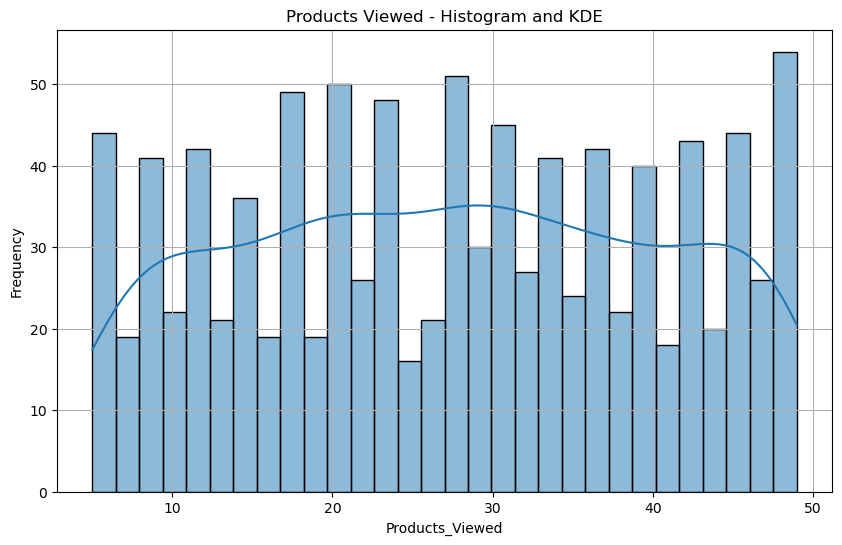

In [188]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Products_Viewed", kde=True, bins=30) 
plt.title("Products Viewed - Histogram and KDE")
plt.xlabel("Products_Viewed")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Histogramda bazı barlar arasında frekans farklılıkları görülmektedir.
Ancak bu farklar aşırı olmadığından ve KDE eğrisi genel olarak dengeli seyrettiğinden, bu dalgalanmalar doğal veri çeşitliliği olarak yorumlanmıştır. 
Veriler farklı kullanıcı davranışlarını yansıttığı için aralıklı iniş çıkışlar normal olarak değerlendirildi.

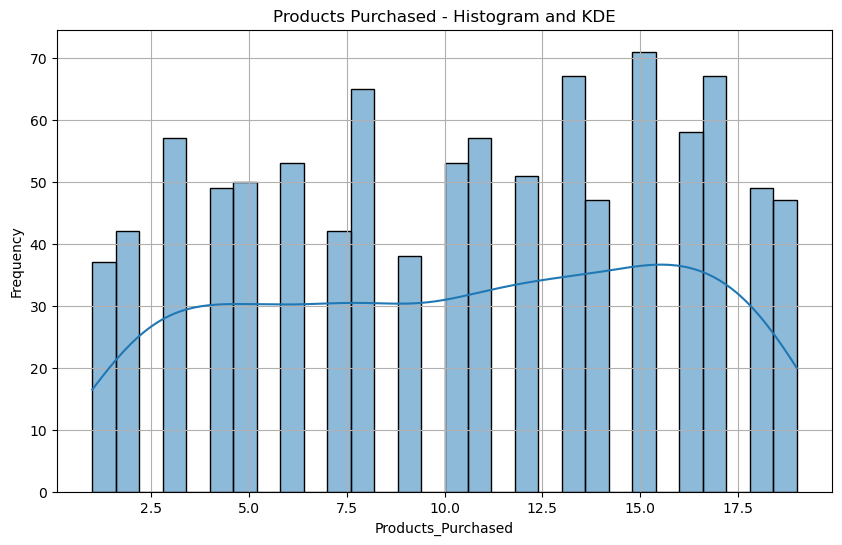

In [190]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Products_Purchased", kde=True, bins=30) 
plt.title("Products Purchased - Histogram and KDE")
plt.xlabel("Products_Purchased")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

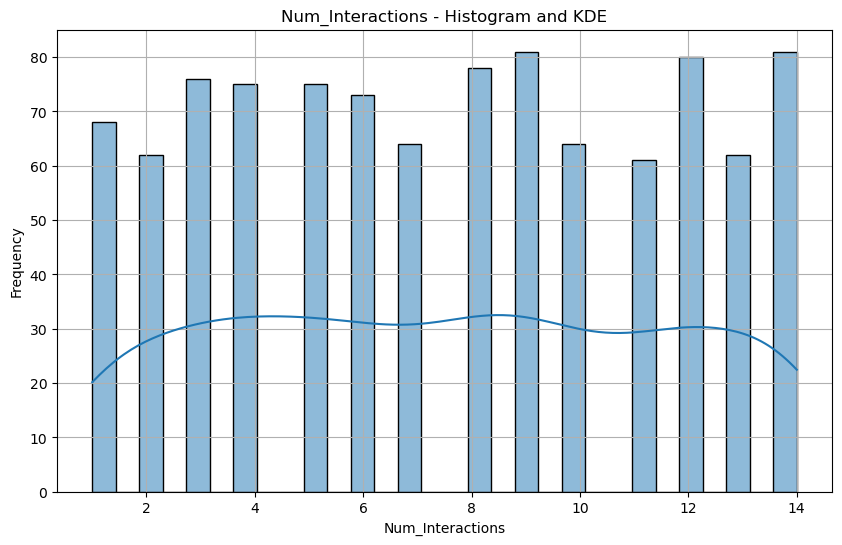

In [192]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Num_Interactions", kde=True, bins=30) 
plt.title("Num_Interactions - Histogram and KDE")
plt.xlabel("Num_Interactions")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

KDE eğrisi incelendiğinde, 2–4 etkileşim aralığında kullanıcı yoğunluğunun arttığı, buna karşın 12–14 aralığında yoğunluğun azalmaya başladığı gözlemlenmiştir. Bu durum, düşük etkileşimli kullanıcıların veri setinde daha baskın olduğunu, yüksek etkileşimli kullanıcıların ise daha az sayıda olduğunu göstermektedir.

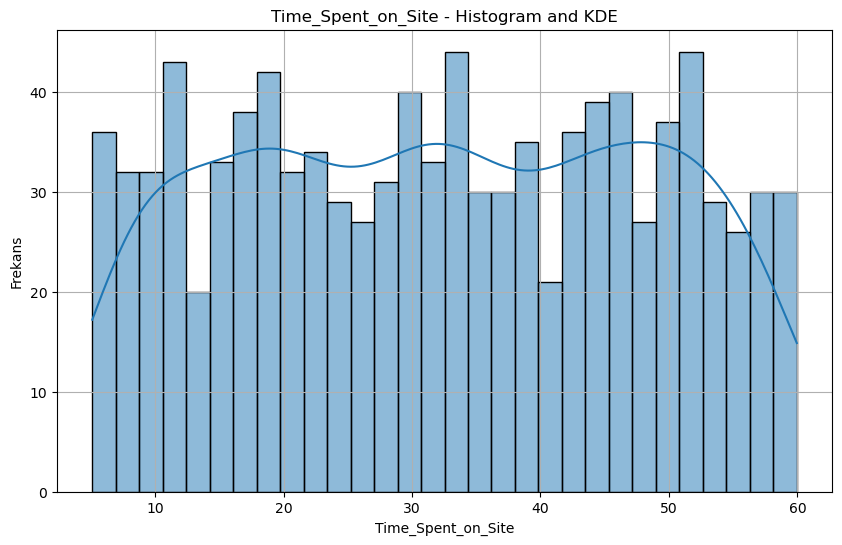

In [175]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Time_Spent_on_Site", kde=True, bins=30) 
plt.title("Time_Spent_on_Site - Histogram and KDE")
plt.xlabel("Time_Spent_on_Site")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Histogram ve KDE eğrisi, kullanıcıların platformda geçirdiği sürelerin büyük çoğunluğunun belirli aralıklarda toplandığını(15-20,30 ve 50dk) ve dikkat çekici bir aykırı değer gözlemlenmiyor. Bu durum, kullanıcıların site kullanım alışkanlıklarında 3 farklı davranış grubunun varlığını düşündürmektedir. 

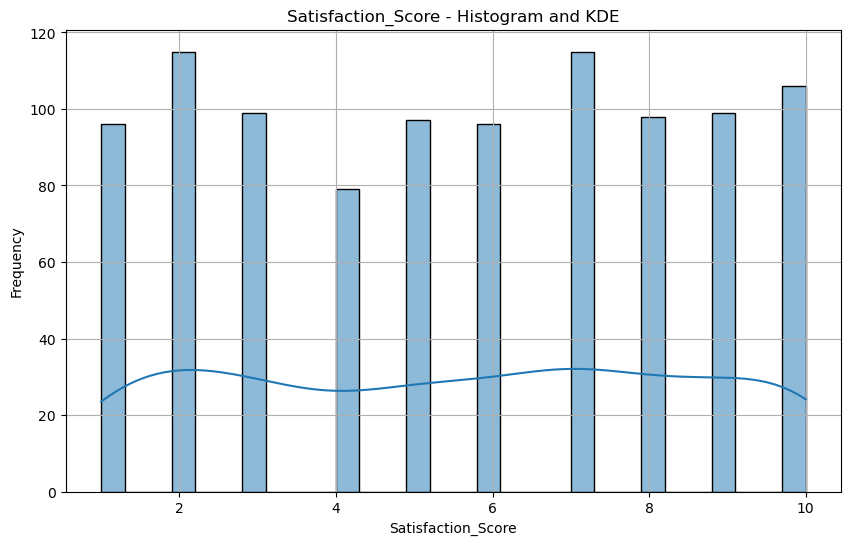

In [194]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Satisfaction_Score", kde=True, bins=30) 
plt.title("Satisfaction_Score - Histogram and KDE")
plt.xlabel("Satisfaction_Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

2 ve 7 puanlarında yüksek frekans değerleri gözlenmiştir.KDE eğrisi bu noktalarda hafif yükselerek, bu skorların etrafında veri yoğunluğu oluştuğunu desteklemektedir.

Sonuç olarak, aykırı değer analizi kapsamında yapılan hesaplamlar (ıqr analizi) ve grafik incelemeleri, veri setinin genel dağılımının dengeli olduğunu ve istatistiksel analizlerle veri setinin aykırı değerler içermediğini göstermektedir.

-**Ancak istatistiksel hesaplamalarla  yapılan  aykırı değer analizi, mantıksal aykırılıkları tespit etmede yetersiz kalabilmektedir. Bu nedenle, veriyi anlamak ve detaylı analizinin yapılması önemlidir. Yaptığım analizlerde gerçek dışı davranış gösteren bazı tutarsız verilerin olduğu anlaşılmıştır. Bu veriler, "Keşifçi Veri Analizi" kısmında açıklanmıştır.**



In [214]:
# ID değişkeninde tekrarlayan veri kontrolü

df["Customer_ID"].duplicated().sum()


0

ID değişkeninde tekrarlayan veri yoktur.

### Keşifçi Veri Analizi - Exploratory Data Analysis (EDA)

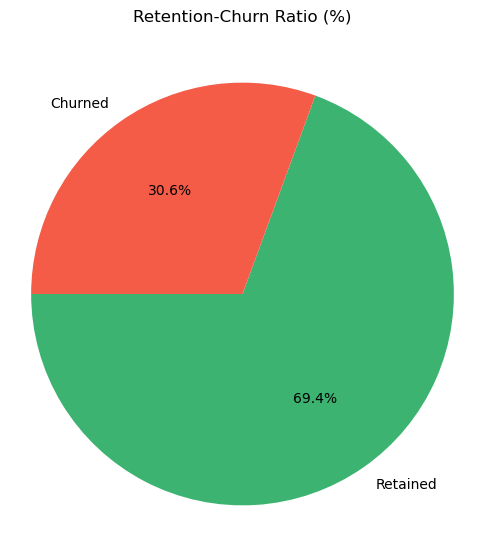

In [769]:
retention_ratio = df["Retention_Status"].value_counts(normalize=True) * 100
colors = ["mediumseagreen", "#F55C47"] 
plt.figure(figsize=(6, 6))
plt.pie(retention_ratio, labels=retention_ratio.index, autopct='%1.1f%%', startangle=180, colors=colors)
plt.title("Retention-Churn Ratio (%)", pad=30) #pad başlık ayarı
plt.axis("equal")
plt.show()


Şirketin churn oranı yaklaşık %31 olup, bu değer birçok sektör için ortalamanın üzerindedir ve dikkate alınması gereken bir durumdur.

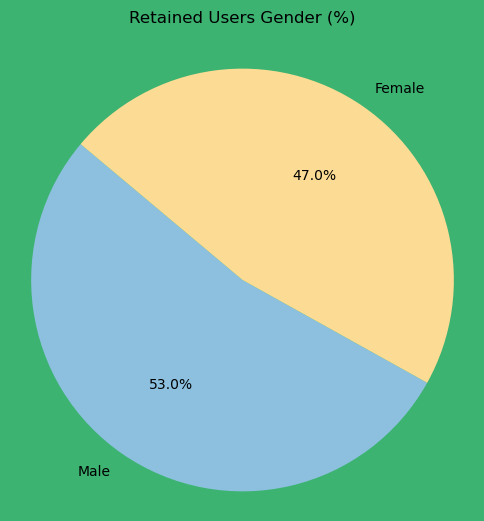

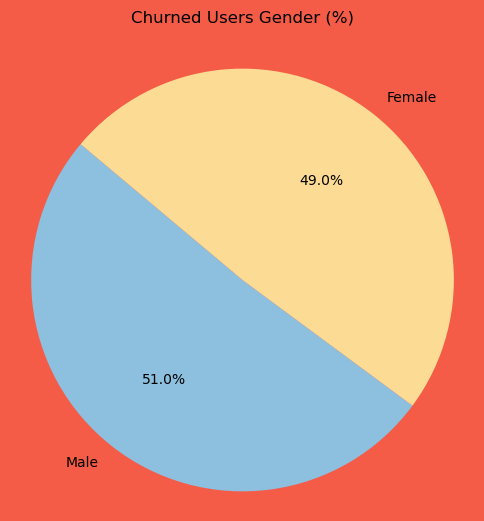

In [1247]:
# Cinsiyet oranları

colors = ['#8CC0DE', '#FCDC94']

retained_gender = df[df["Retention_Status"] == "Retained"]["Gender"].value_counts(normalize=True) * 100
churned_gender = df[df["Retention_Status"] == "Churned"]["Gender"].value_counts(normalize=True) * 100

# Retained Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(retained_gender, labels=retained_gender.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Retained Users Gender (%)", pad=20)
plt.axis("equal")
plt.gcf().set_facecolor('mediumseagreen')   # Arka plan rengi
plt.show()

# Churned Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(churned_gender, labels=churned_gender.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Churned Users Gender (%)", pad=20)
plt.axis("equal")
plt.gcf().set_facecolor('#F55C47')   # Arka plan rengi
plt.show()


Retained ve churned kullanıcı gruplarında kadın-erkek oranlarının benzer olması, şirket ürünlerinin her iki cinsiyet segmentinde de benzer düzeyde ilgi gördüğünü göstermektedir.

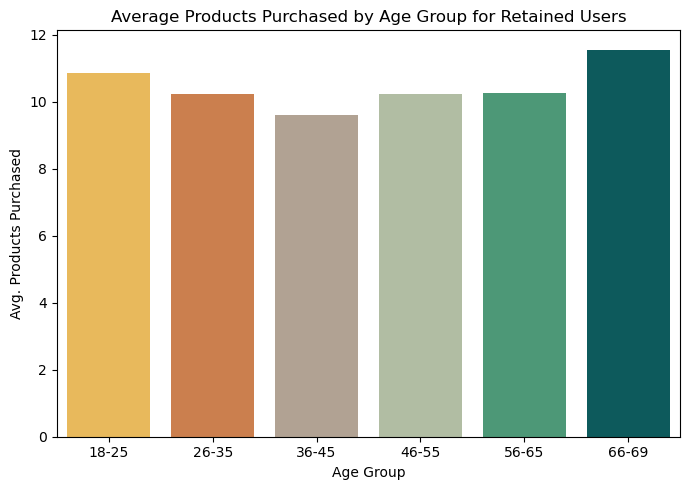

In [742]:
palette = ["#FFC145", "#E07B39", "#B6A28E", "#B1C29E", "#40A578", "#006769"]

retained_df = df[df["Retention_Status"] == "Retained"].copy()

# Yaş gruplarını belirleme
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-69"]
retained_df["Age_Group"] = pd.cut(retained_df["Age"], bins=bins, labels=labels, right=False)

# Yaşa göre ortalama alınan ürün hesaplaması 
age_purchase = retained_df.groupby("Age_Group", observed=False)["Products_Purchased"].mean().reset_index()


plt.figure(figsize=(7, 5))
sns.barplot(data=age_purchase, x="Age_Group", y="Products_Purchased", hue="Age_Group", palette=palette, legend=False)
plt.title("Average Products Purchased by Age Group for Retained Users")
plt.xlabel("Age Group")
plt.ylabel("Avg. Products Purchased")
plt.tight_layout()
plt.show()

Aktif kullanıcıların yaş gruplarına göre ortalama ürün satın alma dağılımı incelendiğinde, gruplar arasında belirgin bir fark görülmemektedir. 
En yüksek ortalama alışveriş, 66–69 yaş grubunda gözlenirken; bunu 18–25 yaş aralığındaki genç kullanıcılar takip etmektedir.
Ürünün hem genç hem ileri yaş kullanıcılar arasında yüksek ilgi gördüğünü, geniş bir kullanıcı kitlesine hitap ettiğini ve farklı yaş grupları tarafından erişilebilir olduğu görülmektedir. 
Özellikle en yüksek alışveriş oranının ileri yaş grubununda olması, ürünün hem erişilebilirlik hem de kullanıcı deneyimi açısından iyi olduğunu düşündürmektedir.

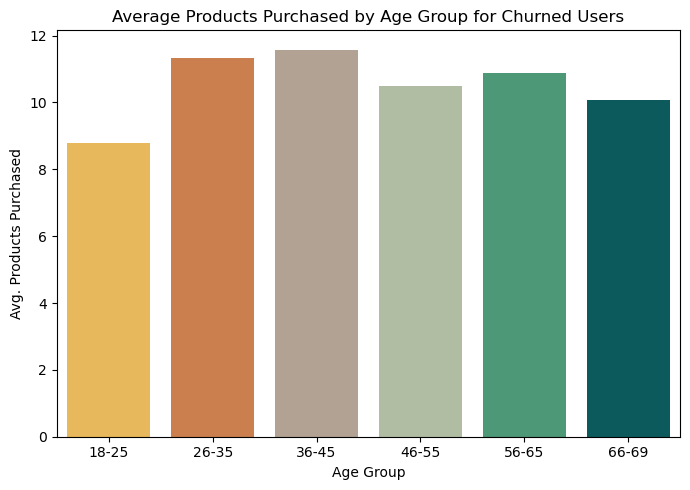

In [1258]:
palette = ["#FFC145", "#E07B39", "#B6A28E", "#B1C29E", "#40A578", "#006769"]

churned_df = df[df["Retention_Status"] == "Churned"].copy()

bins = [18, 25, 35, 45, 55, 65, 70]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-69"]
churned_df["Age_Group"] = pd.cut(churned_df["Age"], bins=bins, labels=labels, right=False)

# Yaşa göre ortalama alınan ürün hesaplaması 
age_purchase = churned_df.groupby("Age_Group", observed=False)["Products_Purchased"].mean().reset_index()


plt.figure(figsize=(7, 5))
sns.barplot(data=age_purchase, x="Age_Group", y="Products_Purchased", hue="Age_Group", palette=palette, legend=False)
plt.title("Average Products Purchased by Age Group for Churned Users")
plt.xlabel("Age Group")
plt.ylabel("Avg. Products Purchased")
plt.tight_layout()
plt.show()

Churn eden kullanıcılar arasında 26–45 yaş grubu, ortalama ürün satın alma düzeyi açısından en yüksek seviyededir. Özellikle 36–45 yaş grubunda churn öncesi yüksek alışveriş aktivitesi dikkat çekmektedir. Buna karşılık, aynı yaş grubundaki aktif kullanıcılar en düşük satın alma ortalamasına sahiptir. Bu durum, bazı kullanıcıların yüksek alışveriş eğilimi göstermesine rağmen elde tutulamadığını ve 36–45 yaş aralığındaki aktif kullanıcıların ileride churn etme olasılığının yüksek olabileceğini göstermektedir.

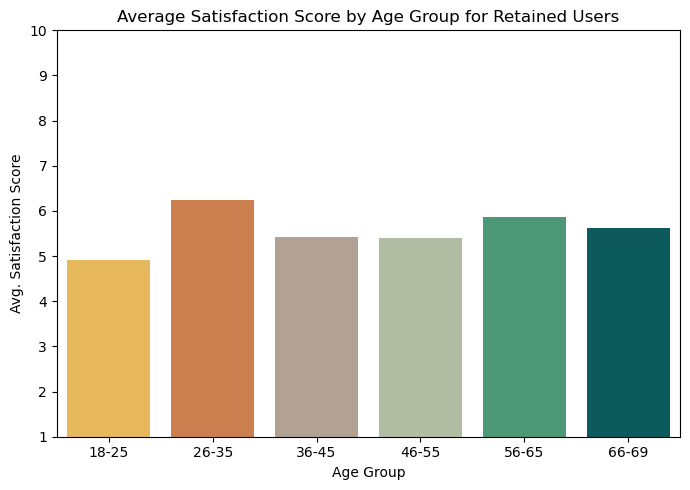

In [746]:
palette = ["#FFC145", "#E07B39", "#B6A28E", "#B1C29E", "#40A578", "#006769"]

age_satisfaction = retained_df.groupby("Age_Group", observed=False)["Satisfaction_Score"].mean().reset_index()

# Bar grafiği ile göster
plt.figure(figsize=(7, 5))
sns.barplot(data=age_satisfaction, x="Age_Group", y="Satisfaction_Score", hue="Age_Group", palette=palette, legend=False)
plt.ylim(1,10)
plt.title("Average Satisfaction Score by Age Group for Retained Users")
plt.xlabel("Age Group")
plt.ylabel("Avg. Satisfaction Score")
plt.tight_layout()
plt.show()

Retained kullanıcılar arasında memnuniyet skoru yaş gruplarına göre küçük farklar göstermektedir. En yüksek memnuniyet 26–35 yaş aralığında gözlenirken, en düşük skor 18–25 yaş grubundadır. 

Ancak yaş gruplarının sabit aralıklarla tanımlanması ve kullanıcı sayılarının eşit olmaması ihtimali, sonuçlarda belirli bir yanlılık riski oluşturabilir. Bu nedenle, analizlerin güvenilirliğini artırmak amacıyla değerlendirmeler count ve boxplot grafiklerle desteklenmiştir.




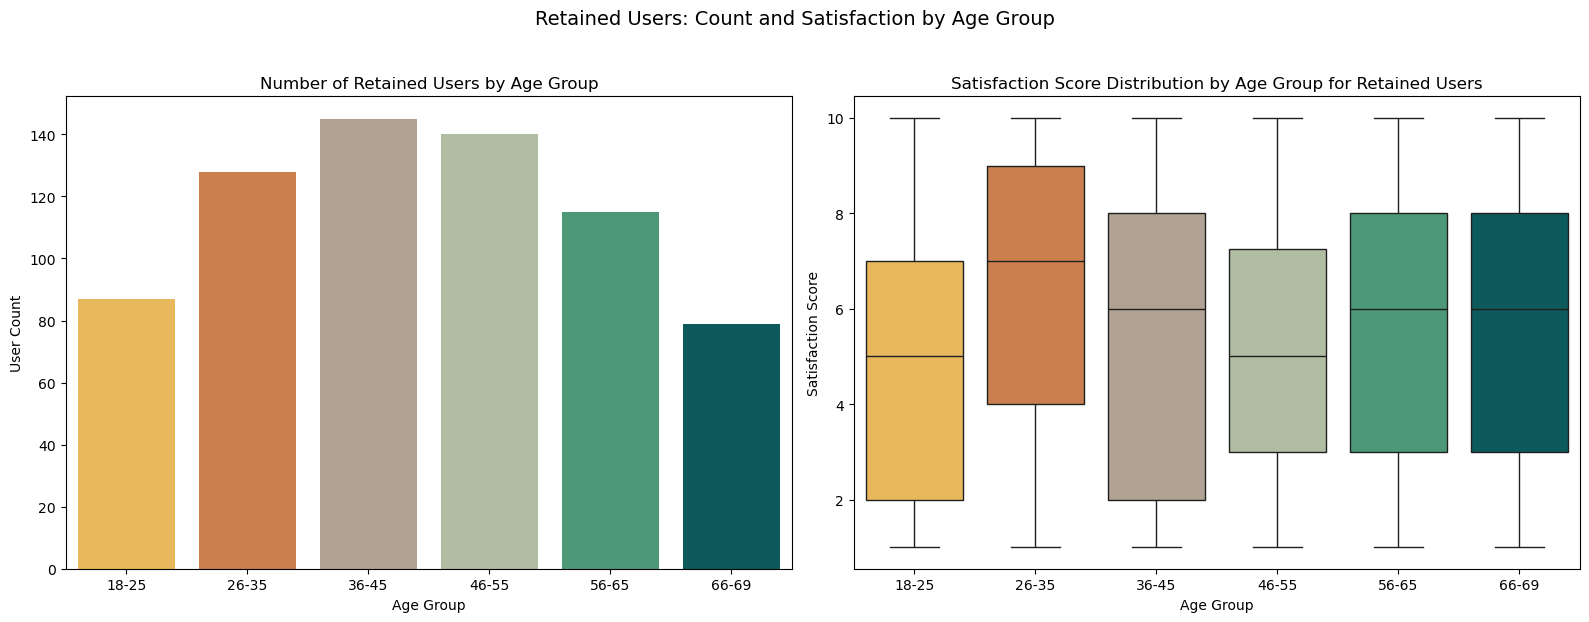

In [1265]:
palette = ["#FFC145", "#E07B39", "#B6A28E", "#B1C29E", "#40A578", "#006769"]

plt.figure(figsize=(16, 6))  

# Üst başlık
plt.suptitle("Retained Users: Count and Satisfaction by Age Group", fontsize=14, y=1.03)

# 1. Kullanıcı sayısı (bar plot)
plt.subplot(1, 2, 1)
sns.countplot(data=retained_df, x="Age_Group", hue="Age_Group", palette=palette, legend=False)
plt.title("Number of Retained Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("User Count")

# 2. Memnuniyet dağılımı (box plot)
plt.subplot(1, 2, 2)
sns.boxplot(data=retained_df, x="Age_Group", y="Satisfaction_Score", hue="Age_Group", palette=palette, legend=False)
plt.title("Satisfaction Score Distribution by Age Group for Retained Users")
plt.xlabel("Age Group")
plt.ylabel("Satisfaction Score")

plt.tight_layout()
plt.show()

Kullanıcı sayıları ve memnuniyet skorlarının dağılımı ayrı grafiklerle incelenmiş ve önceki bulgularla tutarlılık göstermiştir.

Ayrıca yapılan sayım analizinde (Number of Retained Users by Age Group) en yoğun retained kullanıcı grubunun 36–45 yaş olduğu görülmüştür. Bu bilgi, önceki ortalama temelli analizde doğrudan yer almamış, ancak yeni analizle ortaya çıkarılmıştır.

Bu sonuçlar, ortalama değerlerin yanı sıra grup büyüklüğü ve dağılım yapısının da analizlere dahil edilmesinin karar destek açısından önemini vurgulamaktadır.

Detaylı Analiz:
    
18-25 yaş grubu
İlk grafikte (Average Satisfaction Score by Age Group for Retained Users): Ortalama memnuniyet en düşük.
Boxplot’ta: Medyan ve kutu alt seviyede, gerçekten düşük memnuniyet.

36-45, 46-55, 56-65, 66-69 yaş grupları
İlk grafikte: Ortalama memnuniyet bu gruplarda birbirine yakın, ortalamanın biraz altında veya civarında.
Boxplot’ta: Medyanlar ve kutu konumları da birbirine oldukça yakın, yani bu yaş gruplarında hem ortalama hem dağılım birbirine benziyor.

26-35 yaş grubu
İlk grafikte: bu yaş grubu ortalama memnuniyet skorunda zirvede.
Boxplot'ta: Medyan memnuniyet skorunun yüksek olması, bu grubun diğer yaş gruplarına göre daha memnun olduğunu doğrulamaktadır.


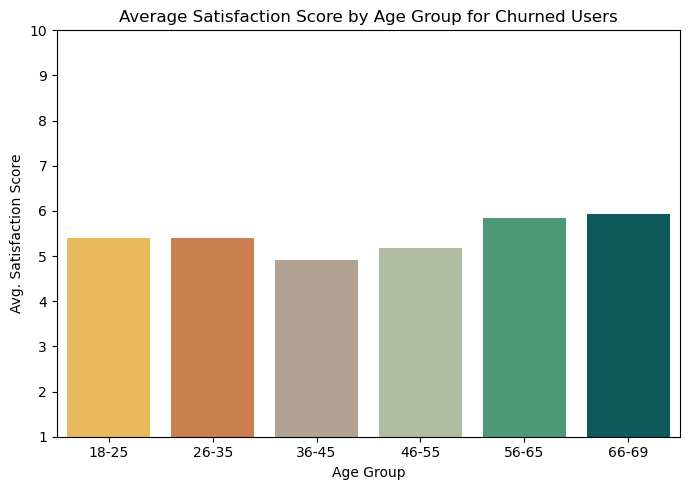

In [755]:
palette = ["#FFC145", "#E07B39", "#B6A28E", "#B1C29E", "#40A578", "#006769"]

age_satisfaction = churned_df.groupby("Age_Group", observed=False)["Satisfaction_Score"].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=age_satisfaction, x="Age_Group", y="Satisfaction_Score", hue="Age_Group", palette=palette, legend=False)
plt.ylim(1,10)
plt.title("Average Satisfaction Score by Age Group for Churned Users")
plt.xlabel("Age Group")
plt.ylabel("Avg. Satisfaction Score")
plt.tight_layout()
plt.show()

Retained ve churned kullanıcıların memnuniyet ortalamalarının benzer seviyelerde (5–6 arası) olması, satisfaction durumunun churn üzerinde tek başına belirleyici olmadığını ve başka faktörlerin de etkili olduğunu göstermektedir. 

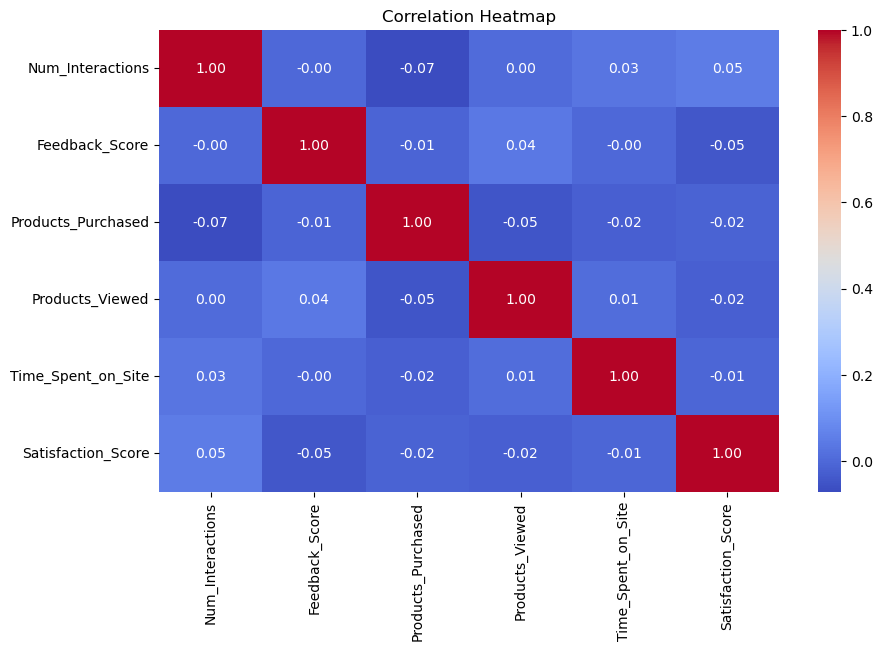

In [1263]:
# Churn kararının çok boyutlu olduğu göz önüne alındığında, memnuniyet dışındaki faktörlerin de etkisini değerlendirebilmek amacıyla heatmap kullanılmıştır.

plt.figure(figsize=(10, 6))
corr_df = df[['Num_Interactions', 'Feedback_Score', 'Products_Purchased',
              'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Veri seti üzerinde yapılan korelasyon analizi sonucunda değişkenler arasında anlamlı ilişkiler tespit edilememiştir. Veri setinin alındığı kaynakta “veriler sentetik olarak üretilmiştir” ifadesine dayanarak, bu durumun veri yapısından kaynaklanıyor olabileceği düşünülmüştür. Bu nedenle, churn ile ilişkili olabilecek değişkenlerin etkileri dağılım temelli görsel analizlerle incelenmiştir.

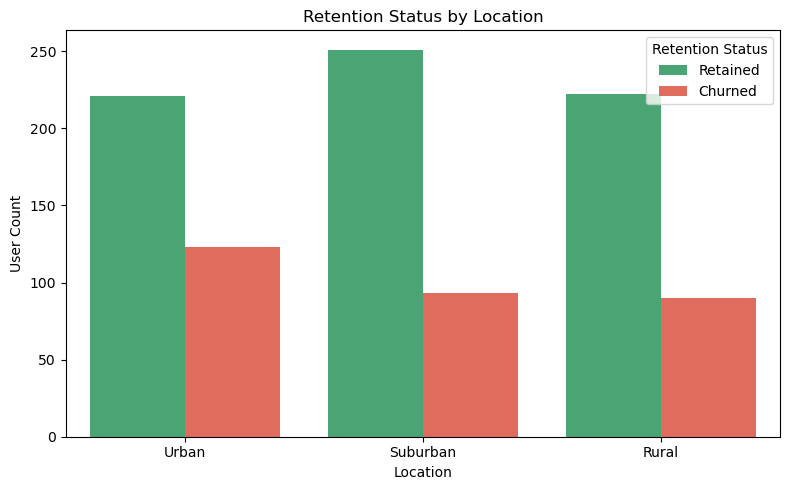

In [767]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, 
              x="Location", 
              hue="Retention_Status",
              palette={"Retained":"mediumseagreen",      
                       "Churned": "#F55C47"},)

plt.title("Retention Status by Location")
plt.xlabel("Location")
plt.ylabel("User Count")
plt.legend(title="Retention Status")
plt.tight_layout()
plt.show()

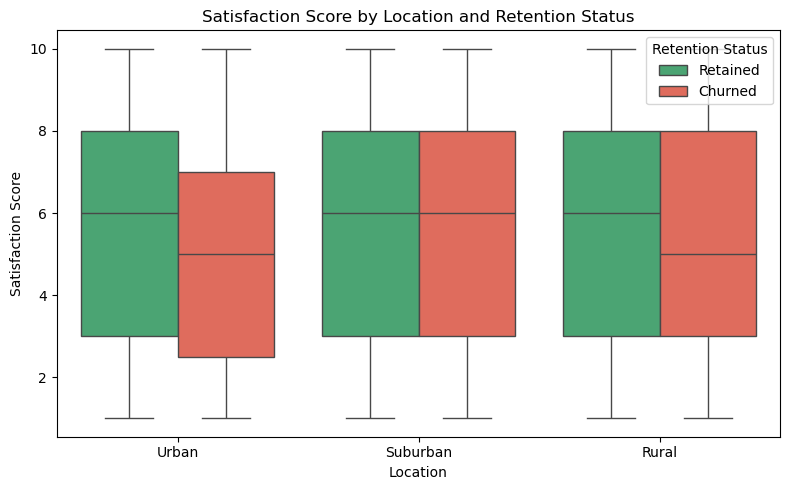

In [771]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df, 
    x="Location", 
    y="Satisfaction_Score",
    hue="Retention_Status",  
    palette={"Retained":"mediumseagreen",     
            "Churned": "#F55C47"},)
plt.title("Satisfaction Score by Location and Retention Status")
plt.xlabel("Location")
plt.ylabel("Satisfaction Score")
plt.legend(title="Retention Status")
plt.tight_layout()
plt.show()

Lokasyona göre memnuniyet skorları incelendiğinde, retained kullanıcılar tüm bölgelerde benzer düzeyde memnuniyet bildirmiştir (medyan ~6). Ancak churn eden kullanıcılar, özellikle Urban ve Rural bölgelerde daha düşük memnuniyet düzeyine sahiptir. Suburban bölgede ise retained ve churned kullanıcılar arasında belirgin bir fark görülmemiştir. Bu nedenle, suburban bölgesindeki retained kullanıcıların churned etme olasılığı yüksek gözükmektedir.

Grafik, özellikle urban ve rural bölgelerde memnuniyetin churn ile daha güçlü bağlantılı olduğunu düşündürmektedir. Bu bölgelerde müşteri deneyimi ve hizmet kalitesi gibi faktörlerin daha yakından izlenmesi faydalı olabilir.


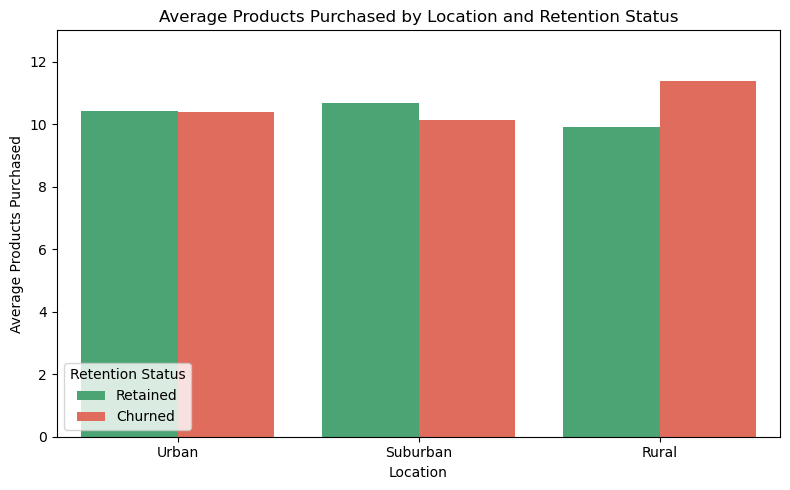

In [775]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Location",
    y="Products_Purchased",
    hue="Retention_Status",
    palette={
        "Retained":"mediumseagreen",     
        "Churned": "#F55C47"     
    },
    errorbar=None
)
plt.title("Average Products Purchased by Location and Retention Status")
plt.xlabel("Location")
plt.ylabel("Average Products Purchased")
plt.ylim(0, 13)  # Y eksenini genişlet
plt.legend(title="Retention Status", loc="lower left")  # Legend'ı kenara taşı
plt.tight_layout()
plt.show()


Ürün satın alma ortalamaları Urban ve Suburban bölgelerde retained ve churned kullanıcılar arasında büyük ölçüde benzerdir. Ancak Rural bölgede churned kullanıcıların, retained kullanıcılardan daha fazla ürün satın aldığı görülmektedir. Bu da bazı kullanıcıların yüksek miktarda alışveriş yapmalarına rağmen elde tutulamadığını göstermektedir. Benzer bir tablo yaş gruplarına göre yapılan alışveriş analizi sonuçlarında da ortaya çıkmıştır. Bu durum, önceki bulgularla tutarlıdır ve kullanıcıların satın alma düzeyi ile sadakat arasında net bir ilişki olmadığını düşündürmektedir.
Rural bölgeye özel anketler, kişiselleştirilmiş öneriler gibi faaliyetlerin yapılması, bu bölgedeki kullanıcıların churned oranının azalmasında ve sadakatinin artmasında etkili olabilir. 

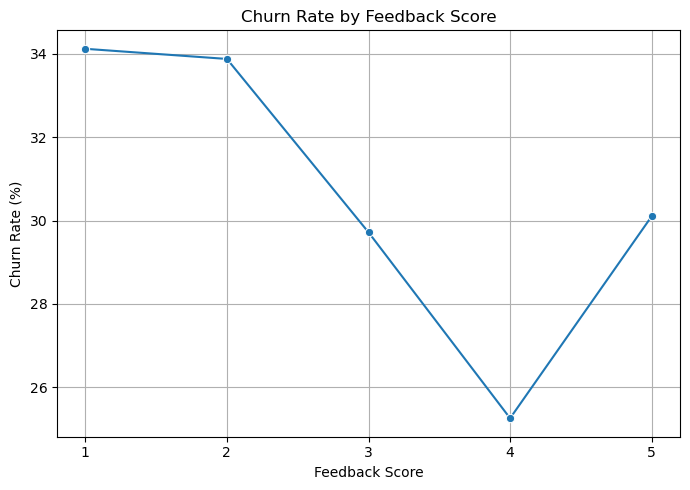

In [459]:
churn_by_feedback = df.groupby("Feedback_Score")["Retention_Status"].value_counts(normalize=True).unstack().fillna(0)
churn_by_feedback["ChurnRate"] = churn_by_feedback["Churned"] * 100  

plt.figure(figsize=(7, 5))
sns.lineplot(data=churn_by_feedback, x=churn_by_feedback.index, y="ChurnRate", marker="o")
plt.title("Churn Rate by Feedback Score")
plt.xlabel("Feedback Score")
plt.ylabel("Churn Rate (%)")
plt.xticks(churn_by_feedback.index)
plt.grid(True)
plt.tight_layout()
plt.show()

Geri bildirim puanı düştükçe churn oranı artmaktadır. Bu durum, düşük feedback score’un kullanıcı memnuniyetsizliğini ve dolayısıyla churn riskini yansıtmaktadır. Ancak en yüksek puanı (5) veren kullanıcılar arasında churn oranının yeniden artış göstermesi, kullanıcı davranışlarının tek boyutlu geri bildirimle tam olarak açıklanamayacağını göstermiştir.

In [515]:
# Feedback 5 olan churned kullanıcıların analizi

five_score_churned = df[(df["Feedback_Score"] == 5) & (df["Retention_Status"] == "Churned")]

columns_to_check = [
    "Satisfaction_Score", "Products_Purchased", "Time_Spent_on_Site",
    "Num_Interactions", "Location", "Age"
]


five_score_churned_summary = five_score_churned[columns_to_check].describe()


pd.DataFrame(five_score_churned_summary).T



,count,mean,std,min,25%,50%,75%,max
Satisfaction_Score,59.0,4.779661,2.566816,1.000000,2.500000,4.000000,7.000000,10.000000
Products_Purchased,59.0,10.406780,5.183258,1.000000,6.500000,10.000000,15.000000,19.000000
Time_Spent_on_Site,59.0,34.760470,16.411581,6.101278,20.027569,34.974025,50.248465,59.611891
Num_Interactions,59.0,7.711864,3.686185,1.000000,5.500000,8.000000,11.000000,14.000000
Age,59.0,39.525424,13.931304,19.000000,28.000000,36.000000,51.500000,69.000000


Feedback 5 olmasına rağmen satisfaction çoğunlukla orta-alt seviyede. Kullanıcı geri bildirimi olumlu olsa da genel deneyimden tam memnun olmamış olabilir.
Bazı kullanıcılar siteyi uzun süre kullanıp birçok ürün satın almışken, bazıları kısa süreli etkileşimle düşük memnuniyet göstermiş olabilir.
Satın alma sayıları genel olarak yüksek olmasına rağmen bu kullanıcılar churn olmuştur. Daha önce lokasyonlara göre yapılan analizde de, yüksek satın alma düzeyine sahip kullanıcılarda churn etme oranlarının fazla olduğu belirlenmiştir.

Bu iki analiz birlikte değerlendirildiğinde, şirketin mevcut sadakat politikasının yeterli olmadığı ya da kullanıcıyı elde tutmakta etkili çalışmadığı sonucuna varılmıştır.

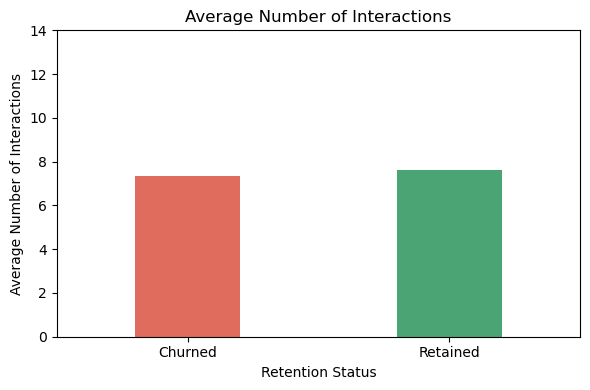

In [777]:
interaction_mean = df.groupby("Retention_Status")["Num_Interactions"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=interaction_mean, x='Retention_Status', y='Num_Interactions', hue='Retention_Status',  width=0.4,errorbar=None,
            palette={"Churned": "#F55C47" , "Retained": "mediumseagreen"})                                #width bar kalınlığı
plt.ylim(0, 14)  
plt.title("Average Number of Interactions")
plt.ylabel("Average Number of Interactions")
plt.xlabel("Retention Status")
plt.tight_layout()
plt.show()


In [1123]:
print(interaction_mean)

  Retention_Status  Num_Interactions
0          Churned          7.349673
1         Retained          7.631124


Retained kullanıcıların sitede çok az farkla daha fazla etkileşimde bulunduğu görülmektedir. Ancak, etkileşim sayısının tek başına kullanıcıyı sitede tutmada belirleyici bir faktör olmadığı anlaşılmaktadır.

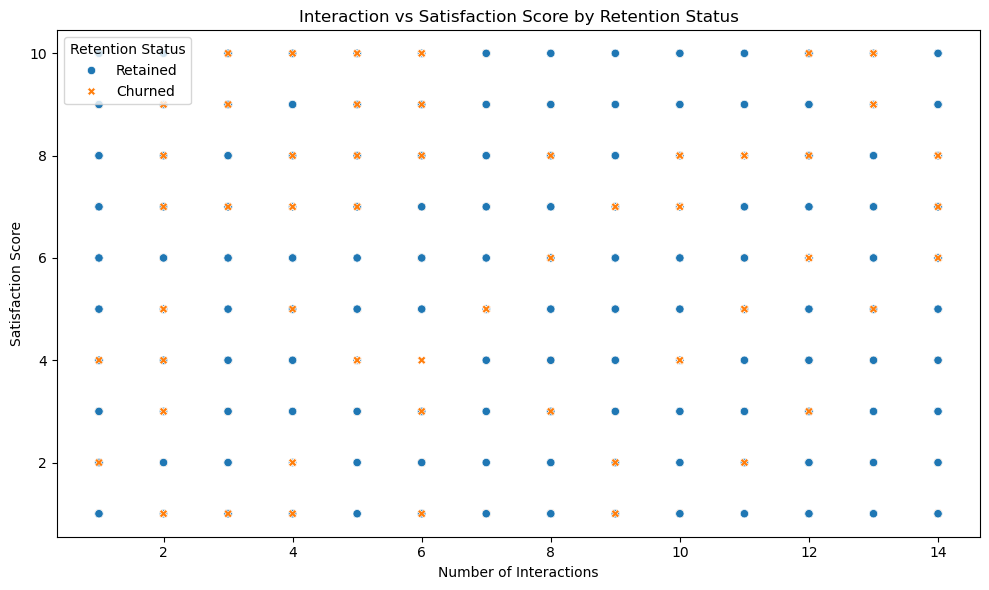

In [540]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Num_Interactions", y="Satisfaction_Score", hue="Retention_Status", style="Retention_Status")
plt.title("Interaction vs Satisfaction Score by Retention Status")
plt.xlabel("Number of Interactions")
plt.ylabel("Satisfaction Score")
plt.legend(title="Retention Status")
plt.tight_layout()
plt.show()

Etkileşim sayısı veya memnuniyet düzeyi için  belirgin  yoğunlaşan bir grup görünmüyor. Aralarında anlamlı ilişki gözükmemektedir.

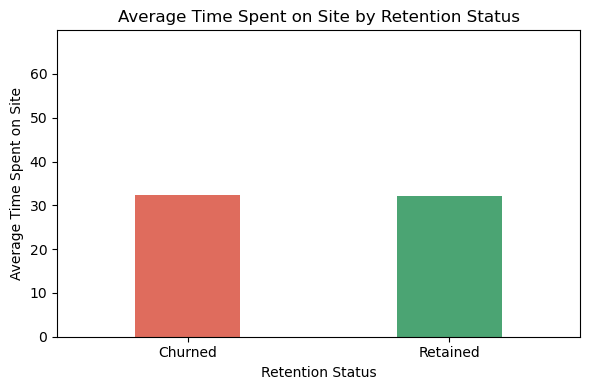

In [818]:
time_spent_avg = df.groupby("Retention_Status")["Time_Spent_on_Site"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(
    data=time_spent_avg,
    x="Retention_Status",
    y="Time_Spent_on_Site", hue='Retention_Status',  width=0.4, errorbar=None,
    palette={"Churned": "#F55C47" , "Retained": "mediumseagreen"})    
plt.title("Average Time Spent on Site by Retention Status")
plt.xlabel("Retention Status")
plt.ylabel("Average Time Spent on Site")
plt.ylim(0, df["Time_Spent_on_Site"].max() + 10)
plt.tight_layout()
plt.show()

In [822]:
print(time_spent_avg)

  Retention_Status  Time_Spent_on_Site
0          Churned           32.368384
1         Retained           32.232959


Sitede zaman geçirme faktörünün retention durumu üzerinde önemli bir etkisi olmadığını söyleyebiliriz. Normalde churned olanların sitede daha az vakit geçirmesi beklenirken, bu veride anlamlı bir fark görülmemektedir.

In [1272]:
# Sitede ortalamının üzerinde ve altında vakit geçiren kullanıcıların satisfaction score ile ilişkisi

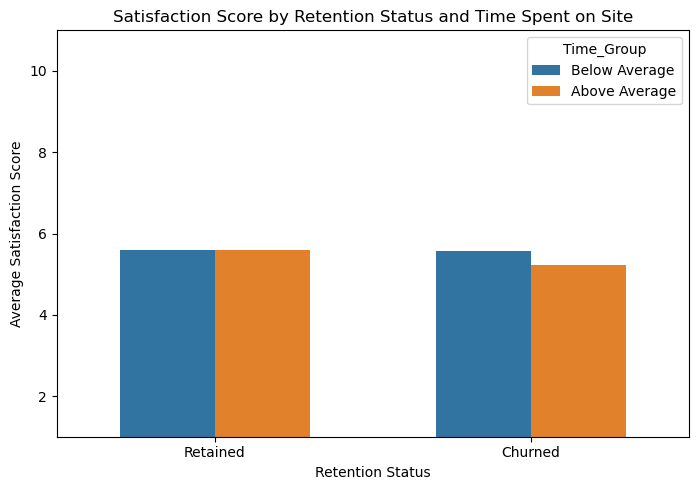

In [1274]:
low = df[df["Time_Spent_on_Site"] < df["Time_Spent_on_Site"].mean()].copy()
low["Time_Group"] = "Below Average"

high = df[df["Time_Spent_on_Site"] > df["Time_Spent_on_Site"].mean()].copy()
high["Time_Group"] = "Above Average"

combined = pd.concat([low, high], axis=0)

plt.figure(figsize=(7, 5))
sns.barplot(
    data=combined,
    x="Retention_Status",
    y="Satisfaction_Score",
    hue="Time_Group",
    width=0.6, errorbar=None
)
plt.title("Satisfaction Score by Retention Status and Time Spent on Site")
plt.xlabel("Retention Status")
plt.ylabel("Average Satisfaction Score")
plt.tight_layout()
plt.ylim(1,11)
plt.show()


Sitede geçirilen zamanın hem retained hem de churned kullanıcıların memnuniyet skorları üzerinde anlamlı bir etkisi olmadığı gözlemlenmiştir. Ortalama altı ve üstü zaman geçiren kullanıcılar arasında, memnuniyet skorları neredeyse aynıdır. Bu sonuç, kullanıcıların sitede daha uzun süre geçirmesinin memnuniyet düzeyinde önemli bir artış veya azalışa yol açmadığını göstermektedir.
Mevcut bulgular, kullanıcı memnuniyeti ve sitede geçirilen süre hakkında genel bir fikir verse de, UI/UX açısından doğrudan bir değerlendirme imkânı sağlamamaktadır.

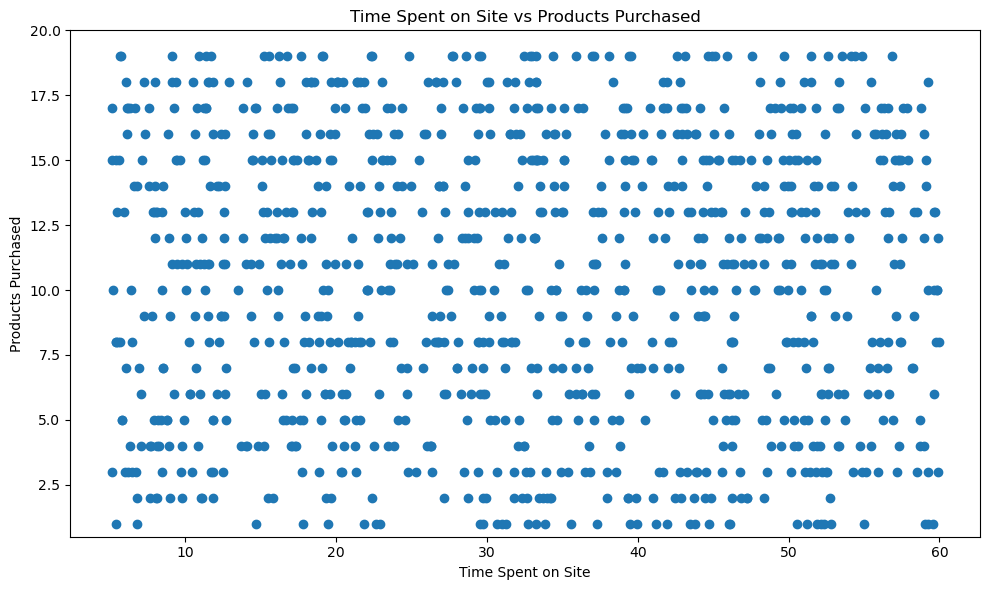

In [1121]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Time_Spent_on_Site"], df["Products_Purchased"])
plt.xlabel("Time Spent on Site")
plt.ylabel("Products Purchased")
plt.title("Time Spent on Site vs Products Purchased")
plt.ylim(0.5,20)
plt.tight_layout()
plt.show()

İki değişken arasında belirgin bir ilişki veya eğilim yoktur. Kullanıcıların sitede geçirdiği süre ile satın aldıkları ürün sayısı arasında güçlü bir bağlantı bulunmamaktadır; farklı zaman aralıklarında farklı miktarda alışveriş yapılabilmektedir. Bu durum, alışveriş davranışının sadece sitede geçirilen süre ile açıklanamayacağını, başka faktörlerin de etkili olabileceğini göstermektedir.

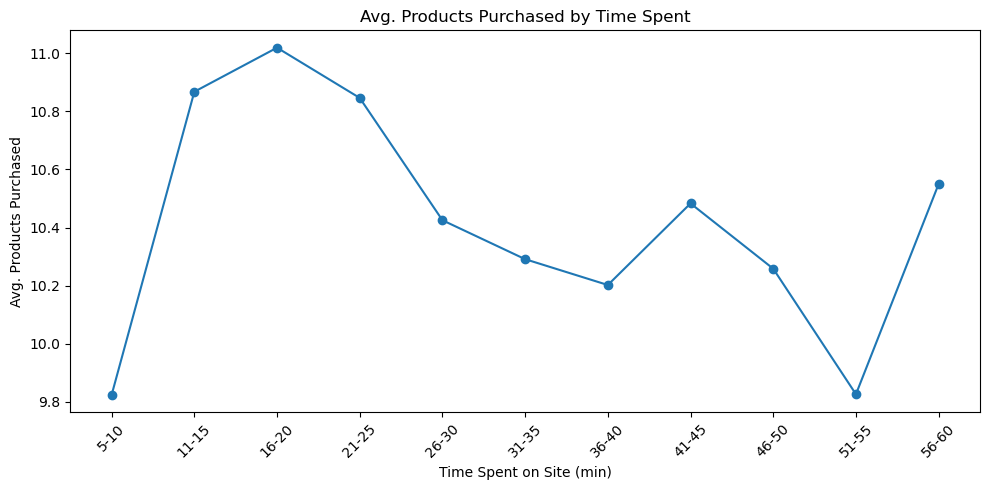

In [1192]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ["5-10", "11-15", "16-20", "21-25", "26-30", "31-35",
          "36-40", "41-45", "46-50", "51-55", "56-60"]

grouped = (df.groupby(pd.cut(df["Time_Spent_on_Site"], bins=bins, labels=labels,))["Products_Purchased"].mean().reset_index())

plt.figure(figsize=(10, 5))
plt.plot(grouped["Time_Spent_on_Site"], grouped["Products_Purchased"], marker="o")
plt.xlabel("Time Spent on Site (min)")
plt.ylabel("Avg. Products Purchased")
plt.title("Avg. Products Purchased by Time Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sitede geçirilen süre ile ortalama ürün satın alma arasında doğrusal ilişkinin olmadığı bu grafikte de açıkça görülmektedir.
Özellikle 10–20 dakika aralığında ortalama satın alma miktarı zirve yaparken, 20. dakikadan sonra bu değer kademeli olarak azalmaktadır. Uzun süre sitede kalan kullanıcıların alışveriş eğilimi ise dalgalı bir seyir izlemektedir. Bu durum, hızlı karar veren kullanıcıların alışveriş davranışlarında öne çıktığını gösterirken, daha uzun süre sitede vakit geçiren kullanıcıların ise karar verme sürecinde daha fazla zorlandığını düşündürmektedir.


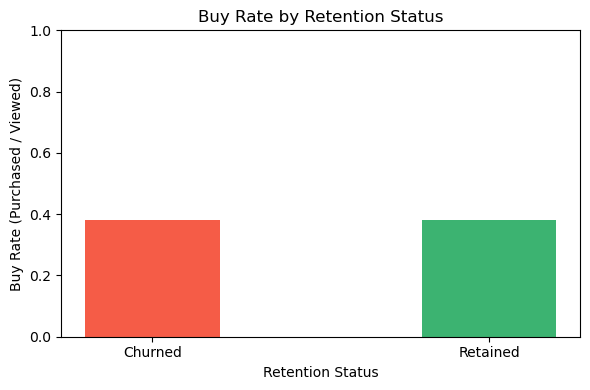

In [826]:
# Buy rate = Tüm kullanıcıların toplam satın aldığı ürün adedi / toplam incelediği ürün adedi

grouped = df.groupby("Retention_Status")[["Products_Purchased", "Products_Viewed"]].sum()
grouped["buy_rate"] = grouped["Products_Purchased"] / grouped["Products_Viewed"]
buy_rate = grouped.reset_index()[["Retention_Status", "buy_rate"]]

plt.figure(figsize=(6, 4))
plt.bar(buy_rate["Retention_Status"], buy_rate["buy_rate"], width=0.4, color=["#F55C47", "mediumseagreen"])
plt.title("Buy Rate by Retention Status")
plt.xlabel("Retention Status")
plt.ylabel("Buy Rate (Purchased / Viewed)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [808]:
print (buy_rate)

  Retention_Status  buy_rate
0          Churned  0.380863
1         Retained  0.380480




Müşterilerin sitede inceledikleri ürünlerin %38’i alışverişle sonuçlanmıştır. Daha önce analizi yapılan ürün satın alma oranı grafiğinde (Average products purchased by location) satın alma miktarının yüksek olduğu görülmüştür. Her iki analiz birlikte değerlendirildiğinde, kullanıcıların sitede ortalama yüksek sayıda ürün satın aldığını ancak, görüntüledikleri ürünlerin büyük bir kısmını satın almadıklarını göstermektedir. Bu durum, kullanıcıların alışverişe istekli olmasına rağmen, satın alma yolculuğunda bazı engellerle karşılaşma ihtimalini veya karar sürecinde  alternatif siteleri tercih etmiş olabileceklerini düşündürmektedir. 

In [1276]:
# Sitede çok ürün inceleyip az ürün alan ("buy_rate" oranı düşük) retained kullanıcılar 

retained = df[df["Retention_Status"] == "Retained"].copy()
retained["user_buy_rate"] = retained["Products_Purchased"] / retained["Products_Viewed"]
retained["user_buy_rate_percent"] = retained["user_buy_rate"] * 100

filtered = retained[(retained["user_buy_rate_percent"] <= 15) & (retained["user_buy_rate_percent"] < 16)]
filtered_sorted = filtered.sort_values("user_buy_rate_percent", ascending=True)
print(filtered_sorted[["Time_Spent_on_Site","Products_Viewed", "Products_Purchased", "user_buy_rate_percent"]].round(1))


     Time_Spent_on_Site  Products_Viewed  Products_Purchased  \
587                37.3               49                   1   
872                59.1               49                   1   
801                33.8               46                   1   
108                51.9               40                   1   
40                 59.6               37                   1   
..                  ...              ...                 ...   
524                17.1               48                   7   
304                44.7               41                   6   
81                 49.2               41                   6   
447                15.3               41                   6   
848                50.4               27                   4   

     user_buy_rate_percent  
587                    2.0  
872                    2.0  
801                    2.2  
108                    2.5  
40                     2.7  
..                     ...  
524                   14.6  

Buy rate oranı %15 ve altında olan kullanıcılar, sitede çok sayıda ürün görüntülemiş ancak bu ürünlerin çok azını satın almıştır. Bu durum, kullanıcıların alışveriş aşamasında karar vermekte zorlandığını veya ürünlerin büyük kısmını tercih etmediğini göstermektedir.
Bu soruna hangi faktörlerin neden olduğunu tespit etmek ve churned riskini azaltmak için düşük alışveriş oranına sahip, mevcut kullanıcılara erişmek ve daha detaylı analiz yapmak faydalı olabilir.

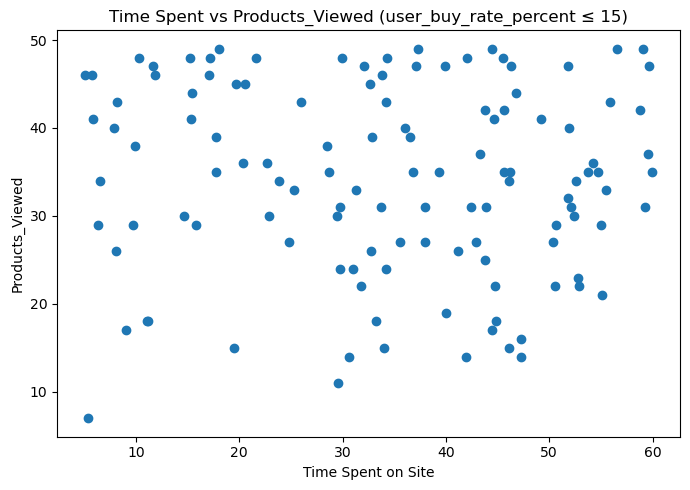

In [1006]:
plt.figure(figsize=(7, 5))

plt.scatter (filtered_sorted["Time_Spent_on_Site"], filtered_sorted["Products_Viewed"])

plt.xlabel("Time Spent on Site")
plt.ylabel("Products_Viewed")
plt.title("Time Spent vs Products_Viewed (user_buy_rate_percent ≤ 15)")
plt.tight_layout()
plt.show()

In [1042]:
corr_value = filtered_sorted[["Time_Spent_on_Site", "Products_Viewed"]].corr().iloc[0, 1]
print("Korelasyon katsayısı:", corr_value)

Korelasyon katsayısı: -0.04973163486437957


Sitede zaman geçirme ve ürün görüntüleme açısından grafik ve korelasyon katsayısına bakıldığında, anlamlı bir ilişki olmadığı görülmektedir.
Ancak dikkat çeken bir durum olarak, bazı kullanıcıların 5-10 dakika gibi kısa sürelerde 40'tan fazla ürün incelediği gözlemlenmiştir. Burada mantıksal bir tutarsızlık olduğunu düşündürmektedir. 


### Mantıksal Olarak Anormal Veriler

In [1175]:
# Her kullanıcı için dakikada bakılan ürün sayısı
filtered_sorted["product_count_per_min"] = filtered_sorted["Products_Viewed"] / filtered_sorted["Time_Spent_on_Site"]

# Dakikada 3 ve üzeri ürün bakan retained kullanıcılar
outlier_users = filtered_sorted[filtered_sorted["product_count_per_min"] >= 3]

#assign() geçici df
output = outlier_users.assign(product_count_per_min = outlier_users["Products_Viewed"] / outlier_users["Time_Spent_on_Site"]
                             
)[["Customer_ID","Time_Spent_on_Site", "Products_Viewed", "Products_Purchased", "product_count_per_min", "user_buy_rate_percent"]]

output.round(1)

,Customer_ID,Time_Spent_on_Site,Products_Viewed,Products_Purchased,product_count_per_min,user_buy_rate_percent
769,770,11.9,46,2,3.9,4.3
303,304,11.7,47,3,4.0,6.4
757,758,5.1,46,3,9.0,6.5
620,621,8.1,26,2,3.2,7.7
647,648,15.2,48,4,3.2,8.3
765,766,6.5,34,3,5.2,8.8
864,865,8.1,43,4,5.3,9.3
80,81,5.8,46,5,7.9,10.9
947,948,5.8,41,5,7.1,12.2
771,772,7.9,40,5,5.1,12.5


Yukarıda bahsedilen tutarsız veriler tespit edilmiştir. Örneğin, Custumer ID'si 758 olan kullanıcı dakikada 9 ürün incelemiştir. 

Yaptığım araştırmaya göre, gerçek dışı davranışın olası sebepleri arasında çok hızlı ve yüzeysel tıklamaların yapılması, verinin hatalı toplanması veya "Products_Viewed" değişkeninin sayfa yenileme ve tekrar tıklamaları da içermesi yer alabilir. Ayrıca, kullanılan veri setinin sentetik olarak üretilmiş olması da bu tür sonuçlara yol açmış olabilir.